### Importing Imp Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
import os
from PIL import Image
import pickle
import random
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import ConfusionMatrixDisplay

### Checking our data input mechanism

## REMEMBER TO ALWAYS DIVIDE BY 255, NO TRAINING PROGRESS WAS THERE DUE TO THIS

(100, 100)
[[0.4627451  0.43137255 0.54509804 ... 0.56078431 0.54509804 0.53333333]
 [0.4745098  0.44705882 0.54117647 ... 0.57647059 0.56078431 0.54901961]
 [0.48627451 0.45490196 0.55294118 ... 0.59607843 0.58039216 0.56078431]
 ...
 [0.31372549 0.39607843 0.37254902 ... 0.27058824 0.27058824 0.27058824]
 [0.30196078 0.29019608 0.30588235 ... 0.28627451 0.27058824 0.28627451]
 [0.29019608 0.29019608 0.29803922 ... 0.28627451 0.31764706 0.30980392]]


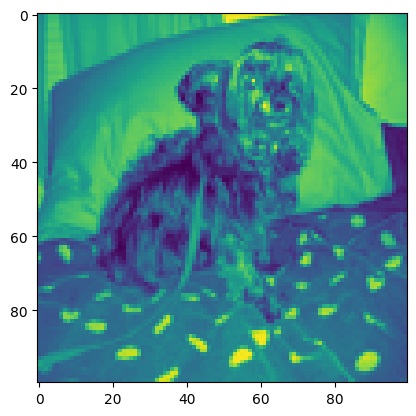

In [2]:
data_dir = 'data/pets'
categories = ['Dog', 'Cat']


category_ = categories[0]
path = os.path.join(data_dir, category_)
for img_ in os.listdir(path):
    image_ = Image.open(os.path.join(path, img_)).resize((100,100)).convert('L')
    img_array = np.array(image_)/255
    print(img_array.shape)
    plt.imshow(img_array)
    print(img_array)
    break

### Processing our input process across all the folders

In [3]:
# data = []
# for i in (0,1):
#     category_ = categories[i]
#     path = os.path.join(data_dir, category_)
#     for img_ in os.listdir(path):
#         try:
#             image_ = Image.open(os.path.join(path, img_)).resize((100,100)).convert('L')
#             img_array = np.array(image_)/255
#             data.append([img_array,i])
#         except:
#             pass

In [4]:
# random.shuffle(data)
# data_inputs = []
# data_lables = []
# for features, lables in data:
#     data_inputs.append(features)
#     data_lables.append(lables)

### size of data input list

In [5]:
# print(len(data_inputs),len(data_inputs[179]),len(data_inputs[179][0]))

### size of lables list

In [6]:
# print(len(data_lables))

### Converting inputs list to Numpy 

In [7]:
# DATA_INPUTS = np.array(data_inputs).reshape(-1,100,100,1)
# DATA_INPUTS.shape

### Converting lables list to Numpy

In [8]:
# DATA_LABLES = np.array(data_lables)
# DATA_LABLES.shape

### Saving the arrays for ready future use

In [9]:
# pickle_out = open('X.pickle', 'wb')
# pickle.dump(DATA_INPUTS, pickle_out)
# pickle_out.close()

# pickle_out = open('Y.pickle', 'wb')
# pickle.dump(DATA_LABLES, pickle_out)
# pickle_out.close()

### Impoting the saved data

In [10]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in.close
X.shape

(24998, 100, 100, 1)

In [11]:
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
pickle_in.close
Y.shape

(24998,)

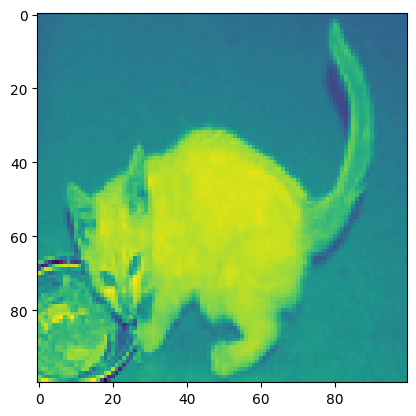

In [12]:
plt.imshow(X[1])
# data

In [13]:
print(Y[1])

1


### Extracting Training Data

In [14]:
X_train = X[:21000]
Y_train = Y[:21000]

In [15]:
X_train.shape, Y_train.shape

((21000, 100, 100, 1), (21000,))

### Creating model

In [16]:
model = Sequential([
    Conv2D(filters = 64, kernel_size = (3,3), strides = 2, activation = 'relu', input_shape = (100, 100, 1)), 
    Dropout(0.2),
    MaxPooling2D(pool_size = (2,2), strides = 1),
    
    Conv2D(filters = 48, kernel_size = (3,3), strides = 2, activation = 'relu'), 
    MaxPooling2D(pool_size = (2,2), strides = 1), 
    
    Conv2D(filters = 32, kernel_size = (3,3), strides = 2, activation = 'relu'), 
    Dropout(0.2),
    MaxPooling2D(pool_size = (2,2), strides = 1),
    
    Conv2D(filters = 16, kernel_size = (3,3), strides = 2, activation = 'relu'), 
    MaxPooling2D(pool_size = (2,2), strides = 1),
    
    Flatten(),
    Dense(512, activation = 'sigmoid'),
    Dropout(0.2),
    Dense(256, activation = 'sigmoid'),
    Dense(1, activation = 'sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 49, 64)        640       
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 48)        27696     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        1

### Compiling Model

In [18]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'nadam',
             metrics = ['accuracy'])

### MODEL TRAINING

In [19]:
hist = model.fit(X_train, Y_train, epochs = 25, batch_size = 80, validation_split = 0.2)

Epoch 1/25
210/210 [==============================] - 13s 26ms/step - loss: 0.7044 - accuracy: 0.5139 - val_loss: 0.6725 - val_accuracy: 0.5921
Epoch 2/25
210/210 [==============================] - 5s 25ms/step - loss: 0.6508 - accuracy: 0.6188 - val_loss: 0.6369 - val_accuracy: 0.6186
Epoch 3/25
210/210 [==============================] - 5s 24ms/step - loss: 0.5999 - accuracy: 0.6791 - val_loss: 0.5781 - val_accuracy: 0.7000
Epoch 4/25
210/210 [==============================] - 5s 24ms/step - loss: 0.5582 - accuracy: 0.7173 - val_loss: 0.5333 - val_accuracy: 0.7386
Epoch 5/25
210/210 [==============================] - 5s 24ms/step - loss: 0.5283 - accuracy: 0.7340 - val_loss: 0.5087 - val_accuracy: 0.7524
Epoch 6/25
210/210 [==============================] - 5s 24ms/step - loss: 0.4994 - accuracy: 0.7550 - val_loss: 0.4797 - val_accuracy: 0.7679
Epoch 7/25
210/210 [==============================] - 5s 24ms/step - loss: 0.4741 - accuracy: 0.7721 - val_loss: 0.4976 - val_accuracy: 0.758

### MODEL PREDICTION AND ACCURACY ON TEST

In [20]:
pred = model.predict(X[21000:]).reshape(-1)
pred[pred<=0.5] = 0
pred[pred>0.5] = 1
acc(Y[21000:],pred.astype(int))

125/125 [==============================] - 1s 3ms/step


0.8451725862931466

### TRAINING VS VALIDATON LOSS

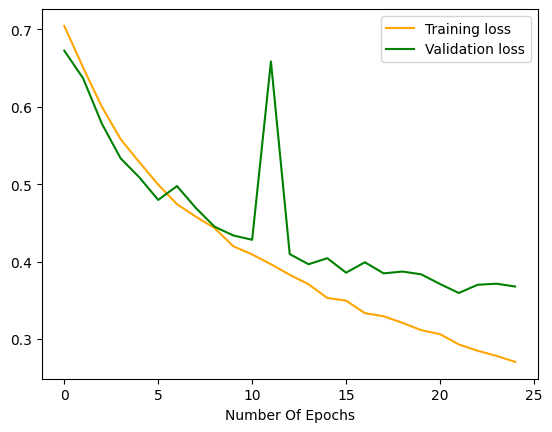

In [21]:
plt.plot(hist.history['loss'], color = 'orange')
plt.plot(hist.history['val_loss'], color = 'green')
plt.xlabel('Number Of Epochs')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

### ACCURACY COMPARISON

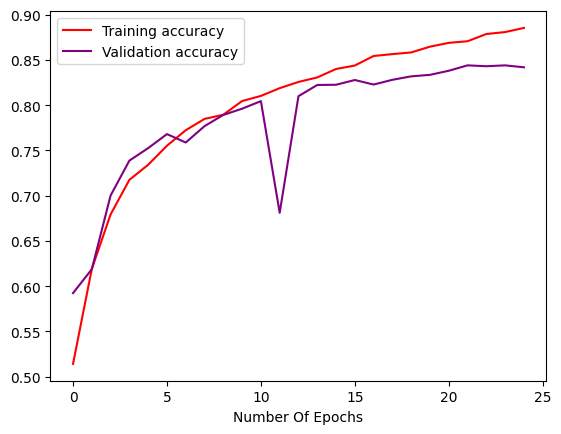

In [22]:
plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'purple')
plt.xlabel('Number Of Epochs')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

### CONFUSION MATRIX

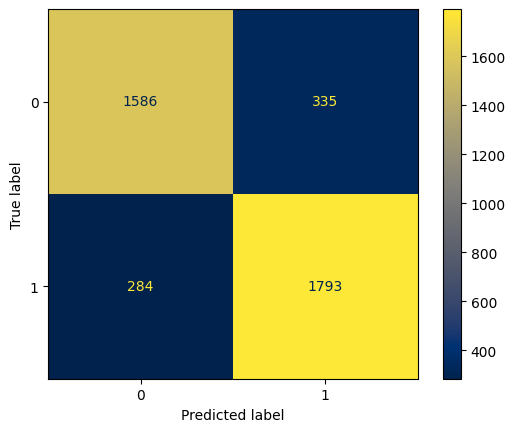

In [23]:
cf = ConfusionMatrixDisplay.from_predictions(Y[21000:], pred, cmap = plt.cm.cividis)